**Integrantes:**

*   Ana Laura Gomes
*   Rafael de Oliveira Moura 

In [ ]:
#importando as bibliotecas necessárias para resolver o trabalho:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import odeint 
sp.init_printing()

# ***QUESTÃO 1:***

*   Reorganizando o PVI do enunciado, têm-se:

$$ 
[x + 4y(x)] \frac{d\,y(x)}{dx} = 2x - y(x) 
$$

$$
y(2) =2
$$

*   Primeiramente, a gente definiu a equação diferencial desse PVI utilizando o comando $sp.Eq$ do sympy

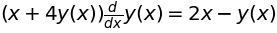

In [68]:
#Definindo x (a variável independente) e y (a variável dependente):
x = sp.symbols('x', real=True)
y = sp.Function('y')

#Definindo a equação diferencial:
EDO = sp.Eq((x + 4* y(x)) * y(x).diff(x),  (2 * x - y(x)))
display(EDO)

*   Podemos verificar a classificação dessa $EDO$ segundo o Python, utilizando o comando $\text{sp.classify_ode}$.

In [69]:
#Constatando a classificação dessa EDO 
sp.classify_ode(EDO, y(x))

('1st_exact',
 '1st_homogeneous_coeff_best',
 '1st_homogeneous_coeff_subs_indep_div_dep',
 '1st_homogeneous_coeff_subs_dep_div_indep',
 '1st_power_series',
 'lie_group',
 '1st_exact_Integral',
 '1st_homogeneous_coeff_subs_indep_div_dep_Integral',
 '1st_homogeneous_coeff_subs_dep_div_indep_Integral')

*   Como podemos ver, essa equação diferencial possui várias classificações, uma delas é  $\text{EDO EXATA}$

*   Então, com a EDO já definida anteriormente, podemos a resolver utilizando o comando $sp.dsolve$ do sympy, a partir do $\text{Método de EDO EXATAS}$ .

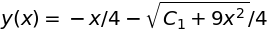

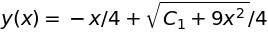

In [70]:
#Resolvendo a EDO:
resposta = sp.dsolve(EDO, y(x), hint='1st_exact')
display(resposta[0])
display(resposta[1])


*   Portanto, resolvendo essa EDO, o Python nos forneceu as seguintes equações como resolução dessa EDO:

$$
y(x) = -\frac {x}{4} \pm \frac {\sqrt{C_1 + 9x^2}}{4}
$$

*   Mas como é um problema de valor inicial $(PVI)$, logo, devemos aplicar a condição inicial para determinar o valor da constante $C_1$.

$$
y(2) = 2
$$


In [71]:
#Definindo a constante C1:
C1 = sp.symbols('C1', real=True)

#Definindo a equação com a aplicação da condição inicial que é y(2)=2:
pvi = sp.Eq(2, (-2/4 + sp.sqrt(C1 + 9 * 2**2)/4))
display(pvi)

In [72]:
#Calculando o valor da constante C1:
valor_constante_C1 = sp.solve(pvi, C1)
valor_constante_C1[0]

*   O valor da constante $C_1 = 64$

*   Portanto, a solução desse PVI é:
$$
y(x) = \frac {-x}{4} + \frac {\sqrt{64 + 9x^2}}{4}
$$



# ***QUESTÃO 2:***

**Letra a)**

*   A EDO do enunciado é:

$$ 
x \frac{d\,y(x)}{dx} + y(x)= y^2(x)ln(x)
$$

*   Primeiramente, a gente definiu essa equação diferencial utilizando o comando $sp.Eq$ do sympy

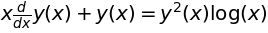

In [74]:
#Definindo x (a variável independente) e y (a variável dependente):
x = sp.symbols('x')
y = sp.Function('y')

#Defininfo a equação diferencial:
EDO_1 = sp.Eq(x * y(x).diff(x) + y(x), y(x)**2 * sp.log(x))
display(EDO_1)

*   Podemos verificar a classificação dessa $EDO$, utilizando o comando $\text{sp.classify_ode}$.

In [75]:
#Constatando a classificação dessa EDO 
sp.classify_ode(EDO_1, y(x))

('Bernoulli', 'lie_group', 'Bernoulli_Integral')

*   Como podemos ver, essa equação diferencial é classificada como uma $\text{EDO de BERNOULLI}$

*   Então, com a EDO já definida anteriormente, podemos a resolver utilizando o comando $sp.dsolve$ do sympy, a partir do $\text{Método de Bernoulli}$ .



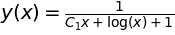

In [76]:
#Resolvendo a EDO:
resolucao = sp.dsolve(EDO_1, y(x), hint='Bernoulli')
resolucao

*   Portanto, resolvendo essa EDO, o Python nos forneceu a seguinte equação como resolução dessa equação diferencial:

$$
y(x) = \frac {1}{C_1 + ln(x) +1}
$$

**Letra b):**

*   A EDO do enunciado é:

$$ 
 \frac{d^2\,y(x)}{dx^2} + y(x)= tg(x)
$$

*   Primeiramente, a gente definiu essa equação diferencial utilizando o comando $sp.Eq$ do sympy

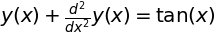

In [77]:
#Definindo x (a variável independente) e y (a variável dependente):
x = sp.symbols('x')
y = sp.Function('y')

#Defininfo a equação diferencial:
EDO_2 = sp.Eq( y(x).diff(x,2) + y(x), sp.tan(x))
display(EDO_2)

*   Podemos verificar a classificação dessa $EDO$, utilizando o comando $\text{sp.classify_ode}$.

In [78]:
#Constatando a classificação dessa EDO 
sp.classify_ode(EDO_2, y(x))

('nth_linear_constant_coeff_variation_of_parameters',
 'nth_linear_constant_coeff_variation_of_parameters_Integral')


*   Como podemos ver, essa equação diferencial é classificada como uma $\text {EDO Linear de segunda ordem com coeficientes constantes e Não-Homogênea}$

*   Então, com a EDO já definida anteriormente, podemos resolver utilizando o comando $sp.dsolve$ do sympy e o $\text{Método de EDO Linear de segunda ordem, Não-Homogênea e com coeficientes constante, variando os parâmetros}$ .


In [79]:
#Resolvendo a EDO:
resolucao2 = sp.dsolve(EDO_2, y(x), simplify=True, hint='nth_linear_constant_coeff_variation_of_parameters')
resolucao2

*   Portanto, resolvendo essa EDO, o Python nos forneceu a seguinte equação como resolução dessa EDO:

$$
y(x) = C_2 sen(x) + (C_1 + \frac {ln[sen(x)-1]}{2} -\frac{ln[sen(x)+1]}{2}) cos(x)
$$


# ***QUESTÃO 3:***

*   Abaixo têm-se a reação química em série e que ocorre dentro do reator em batelada, segundo o enunciado da questão :

$$
A \overset{K_1} \rightarrow B \overset{K_2} \rightarrow C
$$

*   $\text {Têm-se as seguintes hipóteses}$:

*   Como é um reator em batelada, não há corrente de entrada e saída.
*   Concentração inicial de A é $C_{A_0} = 0.05 molL^{-1} $ e de B e C são nulas.
*   Volume constante.
*   Temperatura constante durante a reação (isotérmica).
*   $K_1 = 5 s^{-1}$ e $K_2 = 3s^{-1}$.
*   As Taxas de reação são:

$$
R_A = - K_1 C_A^n
$$

$$
R_B = K_1 C_A^n - K_2 C_B^m
$$

$$
R_C = K_2 C_B^m
$$

*   Em que $n$ é a cinética da reação $A \overset{K_1} \rightarrow B$
*   Em que $m$ é a cinética da reação $B \overset{K_2} \rightarrow C$

**SOLUÇÃO**

*   Primeiramente, fizemos uma balanço de massa por componente, para obter os perfis de concentração de $C_A(t)$ e $C_B(t)$

$$
[Acúmulo] = [gerado] - [consumido]
$$

*   $\text {Balanço de massa da substância A}$:

$$
\frac {dm_A}{dt} = R_A V
$$

*   Sendo $m_A = C_A V$, com $V$ constante, logo, substituindo na equação diferencial, têm-se:

$$
V \frac {dC_A}{dt} = R_A V 
$$

*   Como tem $V$ dos dois lados, eles se anulam. E a taxa de reação da substância A $(R_A)$ é $R_A = - K_1 C_A^n$, substituindo na equação diferencial, têm-se:

$$
\frac {dC_A}{dt} = -K_1 C_A^n (I)
$$

*   $\text {Balanço de massa da substância B}$:

$$
\frac {dm_B}{dt} = R_B V
$$

*   Sendo $m_B = C_B V$, com $V$ constante, logo, substituindo na equação diferencial, têm-se:

$$
V \frac {dC_B}{dt} = R_B V
$$

*   Como tem $V$ dos dois lados, eles se anulam. E a taxa de reação da substância B $(R_B)$ é $R_B = K_1 C_A^n - K_2 C_B^m$, substituindo na equação diferencial, têm-se:

$$
\frac {dC_B}{dt} = K_1 C_A^n - K_2 C_B^m  (II)
$$

*   Portanto, temos um sistema contendo as equações (I) e (II) para resolver, esse sistema é:

$$
\frac {dC_A}{dt} = -K_1 C_A^n 
$$

$$
\frac {dC_B}{dt} = K_1 C_A^n - K_2 C_B^m
$$

**LETRA a):**

*   Considerando $n=1$ e $m=1$.

*   Resolvemos a primeira EDO do sistema, para obter o perfil $C_A(t)$. Sendo $K_1 = 5s^{-1}$ e $C_{A_0} = 0.05 molL^{-1} $.

*   Definimos a equação diferencial utilizando o comando $sp.Eq$ do sympy.

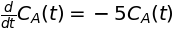

In [ ]:
#Definindo t (a variável independente), C_A (a variável dependente) e K1 = 5 s^-1
t = sp.symbols('t', real=True)
K1 = 5
C_A = sp.Function('C_A')

#Defininfo a equação diferencial:
EDO_3 = sp.Eq(C_A(t).diff(t), - K1 * C_A(t))
display(EDO_3)

*   Com a EDO definida, resolvemos utilizando o comando $sp.dsolve$ do sympy.

In [ ]:
#Resolvendo a EDO:
resol = sp.dsolve(EDO_3, C_A(t))
resol

*   Portanto, resolvendo essa EDO, o Python nos forneceu a seguinte equação como resolução:

$$
C_A(t) = C_1 e^{-5t}
$$

*   Mas como é um problema de valor inicial $(PVI)$, logo, devemos aplicar a condição inicial para determinar o valor da constante $C_1$.

$$
C_A(0) = 0.05
$$

In [ ]:
#Definindo a constante C1:
c1 = sp.symbols('c1', real=True)

#Definindo a equação com a aplicação da condição inicial que é C_A(t=0)=0.05:
pvi_3 = sp.Eq(0.05, c1 * sp.exp(-5 * 0))
display(pvi_3)

In [ ]:
#Calculando o valor da constante C1:
valor_constante_c1 = sp.solve(pvi_3, c1)
valor_constante_c1[0]

*   O valor da constante $C_1 = 0.05$

*   Portanto, a solução desse PVI, que é o perfil $C_A(t)$ é:
$$
C_A(t) = 0.05 e^{-5t}
$$

*   Com o perfil de $C_A(t)$ determinado, agora o substituimos na segunda equação diferencial do sistema, para descobrir o perfil de $C_B(t)$, têm-se:

$$
\frac {dC_B}{dt} = K_1 0.05 e^{-5t} - K_2 C_B
$$

$$
\frac {dC_B}{dt} + K_2 C_B = K_1 0.05 e^{-5t}
$$

*   Resolvemos essa EDO, para obter o perfil $C_B(t)$. Sendo $K_1 = 5s^{-1}$ e $K_2 = 3s^{-1}$.

*   Definimos a equação diferencial utilizando o comando $sp.Eq$ do sympy.



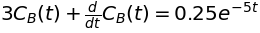

In [ ]:
#Definindo t (a variável independente), C_B (a variável dependente), K1 = 5 s^-1 e K2=3 s^-1
t = sp.symbols('t', real=True)
K1 = 5
K2 = 3
C_B = sp.Function('C_B')

#Defininfo a equação diferencial:
EDO_3_2 = sp.Eq(C_B(t).diff(t) + K2 * C_B(t), K1 * 0.05 * sp.exp(-5 * t))
display(EDO_3_2)

*   Com a EDO definida, resolvemos utilizando o comando $sp.dsolve$ do sympy.

In [ ]:
#Resolvendo a EDO:
resol_2 = sp.dsolve(EDO_3_2, C_B(t))
resol_2

*   Portanto, resolvendo essa EDO, o Python nos forneceu a seguinte equação como resolução:

$$
C_B(t) = (C_1 - 0.125e^{-2t}) e^{-3t}
$$

*   Mas como é um problema de valor inicial $(PVI)$, logo, devemos aplicar a condição inicial para determinar o valor da constante $C_1$.

$$
C_B(0) = 0
$$

In [ ]:
#Definindo a constante C1:
c1 = sp.symbols('c1', real=True)

#Definindo a equação com a aplicação da condição inicial que é C_A(t=0)=0.05:
pvi_3_2 = sp.Eq(0, (c1 - 0.125 * sp.exp(-2 * 0) * sp.exp(-3 * 0)))
display(pvi_3_2)

In [ ]:
#Calculando o valor da constante C1:
valor_constante_c1_2 = sp.solve(pvi_3_2, c1)
valor_constante_c1_2[0]

*   O valor da constante $C_1 = 0.125$

*   Portanto, a solução desse PVI, que é o perfil $C_B(t)$ é:
$$
C_B(t) = (0.125 - 0.125e^{-2t})e^{-3t}
$$

*   Portanto, temos os perfis $C_A(t)$ e $C_B(t)$, que são:

$$
C_A(t) = 0.05 e^{-5t}
$$

$$
C_B(t) = (0.125 - 0.125e^{-2t})e^{-3t}
$$

*   Agora plotamos esses perfil, utilizando $lambda$ para definir esses dois perfil, que são funçoes do tempo $t$. 



<function matplotlib.pyplot.show>

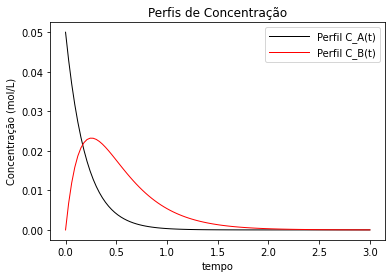

In [ ]:
#Definindo as duas funções para o perfil C_A(t) e C_B(t):
perfil_A = lambda t : 0.05 * np.exp(-5 * t)
perfil_B = lambda t : (0.125 - 0.125 * np.exp(-2 * t)) * np.exp(-3 * t)

#Definindo um intervalo para o tempo t entre 0 e 3, contendo 100 pontos.
tempo = np.linspace (0, 3, 100)

#Calculando o perfil de C_A(t) e C_B(t) dentro desse intervalo de temperatura que criamos:
C_A_plot = perfil_A(tempo)
C_B_plot = perfil_B(tempo)

#Construção do gráfico
plt.plot(tempo, C_A_plot, color='black', linewidth=1, label='Perfil C_A(t)')
plt.plot(tempo, C_B_plot, color='red', linewidth=1, label='Perfil C_B(t)')
plt.xlabel('tempo')
plt.ylabel('Concentração (mol/L)')
plt.title('Perfis de Concentração')
plt.legend(handlelength=4,loc='best')
plt.show

**LETRA b):**

*   Considerando $n=2$ e $m=1$.

*   Resolvemos a primeira EDO do sistema, para obter o perfil $C_A(t)$. Sendo $K_1 = 5s^{-1}$ e $C_{A_0} = 0.05 molL^{-1} $.

*   Definimos a equação diferencial utilizando o comando $sp.Eq$ do sympy.

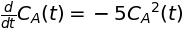

In [60]:
#Definindo t (a variável independente), C_A (a variável dependente) e K1 = 5 s^-1
t = sp.symbols('t', real=True)
K1 = 5
C_A = sp.Function('C_A')

#Defininfo a equação diferencial:
EDO_4 = sp.Eq(C_A(t).diff(t), - K1 * C_A(t)**2)
display(EDO_4)

*   Com a EDO definida, resolvemos utilizando o comando $sp.dsolve$ do sympy.

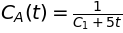

In [66]:
#Resolvendo a EDO:
resolu = sp.dsolve(EDO_4, C_A(t))
resolu



*   Portanto, resolvendo essa EDO, o Python nos forneceu a seguinte equação como resolução:

$$
C_A(t) = \frac {1} {C_1 + 5t}
$$

*   Mas como é um problema de valor inicial $(PVI)$, logo, devemos aplicar a condição inicial para determinar o valor da constante $C_1$.

$$
C_A(0) = 0.05
$$

In [ ]:
#Definindo a constante C1:
c1 = sp.symbols('c1', real=True)

#Definindo a equação com a aplicação da condição inicial que é C_A(t=0)=0.05:
pvi_4 = sp.Eq(0.05, 1 /(c1 + 5 * 0))
display(pvi_4)

In [ ]:
#Calculando o valor da constante C1:
valor_constante_c1_3 = sp.solve(pvi_4, c1)
valor_constante_c1_3[0]

*   O valor da constante $C_1 = 20.0$

*   Portanto, a solução desse PVI, que é o perfil $C_A(t)$ é:
$$
C_A(t) = \frac {1}{20 + 5t}
$$

*   Com o perfil de $C_A(t)$ determinado, agora o substituimos na segunda equação diferencial do sistema, para descobrir o perfil de $C_B(t)$, têm-se:

$$
\frac {dC_B}{dt} = K_1 C_A^{2} - K_2 C_B
$$

$$
\frac {dC_B}{dt} + K_2 C_B = K_1 [\frac {1}{(20 + 5t)}]^2
$$

*   Resolvemos essa EDO, para obter o perfil $C_B(t)$. Sendo $K_1 = 5s^{-1}$ e $K_2 = 3s^{-1}$.

*   Definimos a equação diferencial utilizando o comando $sp.Eq$ do sympy.

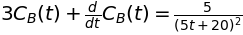

In [ ]:

#Definindo t (a variável independente), C_B (a variável dependente), K1 = 5 s^-1 e K2=3 s^-1
t = sp.symbols('t')
K1 = 5
K2 = 3
C_B = sp.Function('C_B')

#Defininfo a equação diferencial:
EDO_4_2 = sp.Eq( C_B(t).diff(t) + K2 * C_B(t), K1 * (1/(20 + 5 * t)**2))
display(EDO_4_2)

In [ ]:
#Verificando a classificação dessa EDO 
sp.classify_ode(EDO_4_2, C_B(t))

('1st_linear',
 'Bernoulli',
 'almost_linear',
 '1st_power_series',
 'lie_group',
 'nth_linear_constant_coeff_variation_of_parameters',
 '1st_linear_Integral',
 'Bernoulli_Integral',
 'almost_linear_Integral',
 'nth_linear_constant_coeff_variation_of_parameters_Integral')

*   Com a EDO definida, resolvemos utilizando o comando $sp.dsolve$ do sympy, já aplicamos a condição inicial, isto é, em que $C_B(t=0)= 0$ e aplicando o $\text{Método 1st_power_series}$ do sympy para determinar o perfil de $C_B(t)$.




In [ ]:
#Resolvendo a EDO:
resol_3 = sp.dsolve(EDO_4_2, ics = {C_B(0):0}, hint='1st_power_series')
resol_3

*   Portanto, temos os perfis $C_A(t)$ e $C_B(t)$, que são:

$$
C_A(t) = \frac {1}{20+5t}
$$

$$
C_B(t) = \frac{t}{80} - \frac{7t^2}{320} + \frac{29t^3}{1280} - \frac{11t^4}{1640} + \frac{1061t^5}{102400} + \mathcal{O} (t^6)
$$

*   Agora plotamos esses perfil, utilizando $def$ para definir esses dois perfil, que são funçoes do tempo $t$. 


<function matplotlib.pyplot.show>

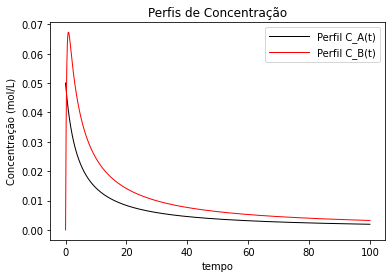

In [73]:
#Definindo as edo do sitema:
def edo_perfil_A(y,t):
  dxdt = -5 * y**2
  return dxdt

def edo_perfil_B(y,t):
  dydt = -3*y + (5 /(20 +5*t))
  return dydt


#condição inicial do PVI:
C_A_0 = 0.05
C_B_0 =0

#Definindo um intervalo para o tempo t:
t = np.linspace(0, 100, 1000)

#Resolvendo as edo e obtendo as equações do perfil de A e do perfil de B:
C_A_t = odeint(edo_perfil_A, C_A_0, t)
C_B_t= odeint(edo_perfil_B, C_B_0, t)

#Construção do gráfico
plt.plot(t, C_A_t, color='black', linewidth=1, label='Perfil C_A(t)')
plt.plot(t, C_B_t, color='red', linewidth=1, label='Perfil C_B(t)')
plt.xlabel('tempo')
plt.ylabel('Concentração (mol/L)')
plt.title('Perfis de Concentração')
plt.legend(handlelength=4,loc='best')
plt.show